In [ ]:
# Task-1: - Perform following operations on image-

# 1.1 Image Resizing: Resizing involves changing the dimensions of an image, either by scaling it up or down.
# 1.1	Image resizing (interpolation methods)
# 1.1.1	Linear
# 1.1.2	Nearest Neighbors
# 1.1.3	Polynomial
# 1.2 Image Blurring: Blurring is used to reduce image detail, suppress noise, or create artistic effects. Common techniques include:
# 1.2	Image blurring
# 1.2.1	Box blurring
# 1.2.2	Gaussian blurring
# 1.2.3	Adaptive blurring


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Task 1: Image Processing

def process_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize using different interpolation methods
    resized_linear = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
    plt.imshow(resized_linear, cmap='gray')
    plt.show()

    resized_nn = cv2.resize(image, (100, 100), interpolation=cv2.INTER_NEAREST)
    plt.imshow(resized_nn, cmap='gray')
    plt.show()

    resized_poly = cv2.resize(image, (100, 100), interpolation=cv2.INTER_CUBIC)
    plt.imshow(resized_poly, cmap='gray')
    plt.show()

    # Blurring techniques
    box_blur = cv2.blur(image, (5, 5))
    gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
    adaptive_blur = cv2.medianBlur(image, 5)

    return resized_linear, resized_nn, resized_poly, box_blur, gaussian_blur, adaptive_blur


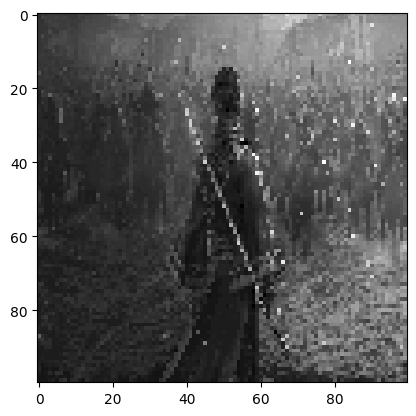

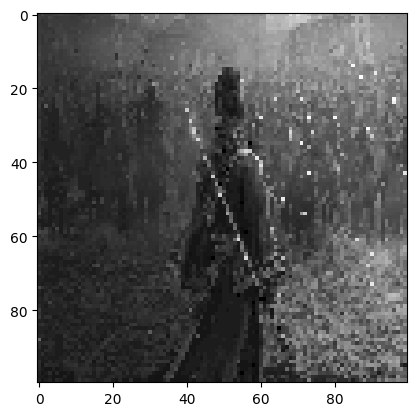

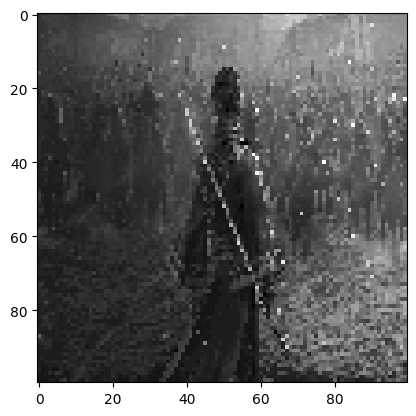

(array([[ 46,  58,  54, ..., 137, 136, 135],
        [ 46,  64,  62, ..., 142, 141, 139],
        [ 52,  50,  61, ..., 141, 139, 139],
        ...,
        [ 28,  21,  25, ..., 107,  83,  54],
        [ 22,  21,  22, ...,  86, 119, 115],
        [ 21,  21,  21, ..., 115,  96,  74]], dtype=uint8),
 array([[ 56,  68,  59, ..., 139, 135, 134],
        [ 59,  59,  56, ..., 134, 138, 138],
        [ 59,  50,  56, ..., 140, 139, 143],
        ...,
        [ 34,  21,  28, ...,  95, 101,  99],
        [ 28,  28,  21, ..., 142,  92,  85],
        [ 34,  21,  28, ..., 130, 123, 119]], dtype=uint8),
 array([[ 46,  58,  54, ..., 137, 136, 135],
        [ 45,  64,  63, ..., 142, 142, 140],
        [ 52,  50,  60, ..., 140, 139, 139],
        ...,
        [ 27,  21,  26, ..., 104,  85,  53],
        [ 20,  20,  22, ...,  85, 119, 115],
        [ 21,  21,  21, ..., 113,  93,  75]], dtype=uint8),
 array([[ 47,  47,  47, ..., 133, 134, 134],
        [ 47,  47,  47, ..., 133, 134, 134],
        [ 47,  4

In [ ]:
process_image("1.png")

In [ ]:

# Task 2: Machine Learning on MNIST

def load_mnist_data():
    digits = load_digits()
    X = digits.images.reshape((len(digits.images), -1))
    y = digits.target
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = load_mnist_data()

# Define models
models = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True)
}

# Perform k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.4f}")

    # Train & Evaluate
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print(f"{name} Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    # ROC Curve
    y_prob = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=model.classes_[1])
    auc_score = auc(fpr, tpr)
    print(f"{name} AUC: {auc_score:.4f}")


In [ ]:

Task-2: - Apply Machine Learning Algorithm and find the model accuracy based on K fold Cross Validation with (80-20 train-test split).
2.1	Use MNIST dataset
2.2	Use any two of the following algorithms-
2.2.1	Naive Bayesian or its variant.
2.2.2	Support Vector Machine (SVM) or its variant
2.2.3	Decision Trees/ Random Forest.
2.2.4	AdaBoost or other ensemble algorithms.
2.2.5	Artificial Neural Networks (NN) or its variant.
2.3	Results should be obtained on following parameters-
2.3.1	Accuracy
2.3.2	Precision (Positive Predictive Value)
2.3.3	Recall (Sensitivity)
2.3.4	F-Measure
2.3.5	Confusion Matrix
2.3.6	ROC
2.3.7	AUC
Appendix:-
About MNIST :-
•	The MINST dataset stands for "Modified National Institute of Standards and Technology".
•	The dataset contains a large collection of handwritten digits that is commonly used for training various image processing systems.
•
•	The dataset was created by re-mixing samples from NIST's original datasets, which were taken from American Census Bureau employees and high school students.
•	It contains 60,000 training images and 10,000 testing images, each of which is a grayscale image of size 28x28 pixels.
o	Number of Instances: 70,000 images
o	Number of Attributes: 784 (28x28 pixels)
o	Target: Column represents the digit (0-9) corresponding to the handwritten image
o	Pixel 1-784: Each pixel value (0-255) represents the grayscale intensity of the corresponding pixel in the image.
o	The dataset is divided into two main subsets:
	Training Set: Consists of 60,000 images along with their labels, commonly used for training machine learning models.
	Test Set: Contains 10,000 images with their corresponding labels, used for evaluating the performance of trained models.
•	Link:- https://www.kaggle.com/datasets/hojjatk/mnist-dataset
•	Note:- Use sklearn, pyspark, or any other ML library for applying the ML algorithms.
o	Load the dataset in sklearn using ‘load_digits’.
o	Load the dataset in pyspark using 'spark.read.csv()